In [1]:
import pandas as pd
import re
import glob
import matplotlib.pyplot as plt

c:\Users\ADMIN\anaconda3\lib\site-packages\pandas\core\computation\expressions.py:21: UserWarning: Pandas requires version '2.8.4' or newer of 'numexpr' (version '2.8.3' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED
c:\Users\ADMIN\anaconda3\lib\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


In [2]:
# # Define a pattern to match file details and pixel change count
# pattern = r'\\([^\\]+)_resized\.tif \((\w+)\): (\d+) pixels changed'

# # Initialize a dictionary to store the data
# data = {}

# # List all txt files (modify the path as needed)
# file_list = glob.glob('./Corruption_pixels_data/*.txt')

# # Loop through each file
# for file_path in file_list:
#     # Extract the file percentage (e.g., '2' from '2.txt')
#     percentage = re.search(r'(\d+)\.txt', file_path).group(1) + '%'
    
#     # Open the current file
#     with open(file_path, 'r') as file:
#         for line in file:
#             match = re.search(pattern, line)
#             if match:
#                 file_name = match.group(1)  # File name
#                 corruption_type = match.group(2)  # Corruption type
#                 pixels_changed = int(match.group(3))  # Pixels changed
                
#                 # If file_name and corruption_type combo not yet in dict, initialize a sub-dict
#                 if (file_name, corruption_type) not in data:
#                     data[(file_name, corruption_type)] = {}
                
#                 # Add the pixels changed for the current percentage
#                 data[(file_name, corruption_type)][percentage] = pixels_changed

# # Convert the dictionary into a DataFrame
# df = pd.DataFrame.from_dict(data, orient='index')

# # Reset index and split the multi-index into separate columns
# df = df.reset_index()
# df.columns = ['file_name', 'corruption_type'] + df.columns[2:].tolist()

# # Sort the percentage columns numerically
# percentage_columns = sorted(df.columns[2:], key=lambda x: int(x.rstrip('%')))
# df = df[['file_name', 'corruption_type'] + percentage_columns]

# print(df)

# df.to_csv("./Corruption_pixels_data/Corruptions.csv", index=False)


Index(['file_name', 'corruption_type', '2%', '12%', '15%', '17%', '20%', '25%',
       '30%'],
      dtype='object')


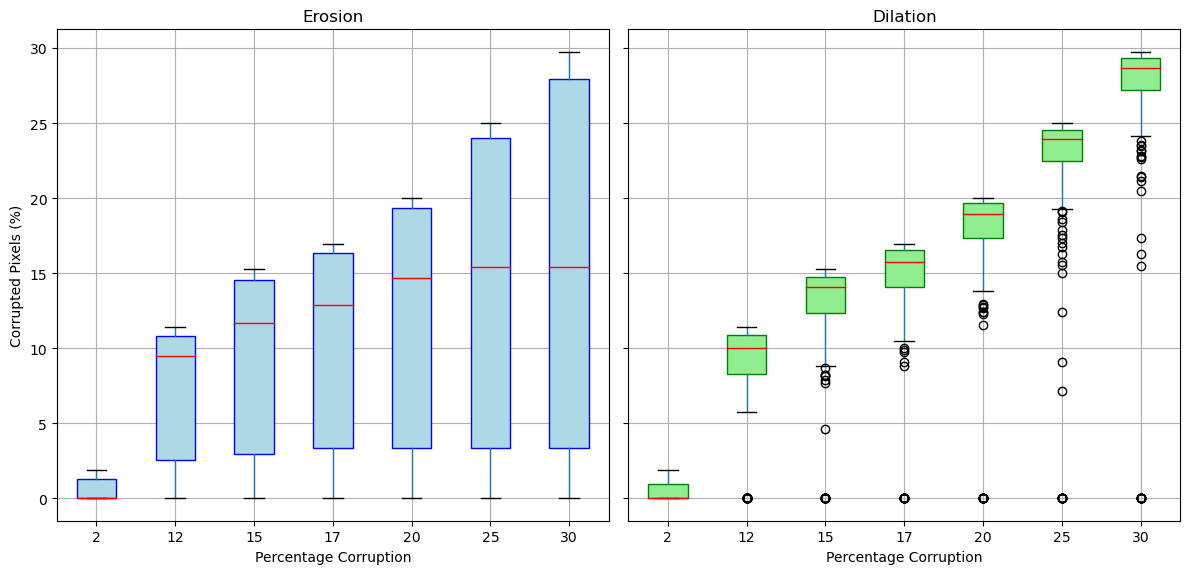

In [3]:
# Assuming the DataFrame 'df' has already been created with sorted percentage columns
# Filter the DataFrame for 'Erosion' and 'Dilation' corruption types
df = pd.read_csv("./Corruption_pixels_data/Corruptions.csv")
print(df.columns)

# Filter for 'Erosion' and 'Dilation' and melt the data
melted_erosion_df = df[df['corruption_type'] == 'Erosion'].melt(
    id_vars=['file_name', 'corruption_type'], 
    value_vars=df.columns[2:], 
    var_name='percentage', 
    value_name='pixels_changed'
)

melted_dilation_df = df[df['corruption_type'] == 'Dilation'].melt(
    id_vars=['file_name', 'corruption_type'], 
    value_vars=df.columns[2:], 
    var_name='percentage', 
    value_name='pixels_changed'
)

# Convert percentage columns to integer values and sort them
melted_erosion_df['percentage'] = melted_erosion_df['percentage'].str.rstrip('%').astype(int)
melted_erosion_df = melted_erosion_df.sort_values(by='percentage')
melted_dilation_df['percentage'] = melted_dilation_df['percentage'].str.rstrip('%').astype(int)
melted_dilation_df = melted_dilation_df.sort_values(by='percentage')

# Calculate percentage of corrupted pixels
image_size = 512 * 512
melted_erosion_df['pixels_percentage'] = (melted_erosion_df['pixels_changed'] / image_size) * 100
melted_dilation_df['pixels_percentage'] = (melted_dilation_df['pixels_changed'] / image_size) * 100

# Create subplots for the boxplots
fig, axs = plt.subplots(1, 2, figsize=(12, 6), sharey=True)

# Colors for filled boxplots
fill_color_erosion = 'lightblue'
fill_color_dilation = 'lightgreen'

# Boxplot for Erosion using percentage
boxprops = dict(facecolor=fill_color_erosion, color='blue')
medianprops = dict(color='red', linewidth=1)
melted_erosion_df.boxplot(column='pixels_percentage', by='percentage', ax=axs[0], 
                          boxprops=boxprops, medianprops=medianprops, patch_artist=True)
axs[0].set_title('Erosion')
axs[0].set_xlabel('Percentage Corruption')
axs[0].set_ylabel('Corrupted Pixels (%)')

# Boxplot for Dilation using percentage
boxprops = dict(facecolor=fill_color_dilation, color='green')
melted_dilation_df.boxplot(column='pixels_percentage', by='percentage', ax=axs[1], 
                           boxprops=boxprops, medianprops=medianprops, patch_artist=True)
axs[1].set_title('Dilation')
axs[1].set_xlabel('Percentage Corruption')

# Adjust layout and save the figure
plt.suptitle('')
plt.tight_layout()
plt.savefig('./Corruption_pixels_data/corruption_boxplots_filled_with_red_medians_percentage.png')

# Display the plot
plt.show()

Index(['Image_Index', 'SSIM_2', 'SSIM_12', 'SSIM_15', 'SSIM_17', 'SSIM_20',
       'SSIM_25', 'SSIM_30'],
      dtype='object')


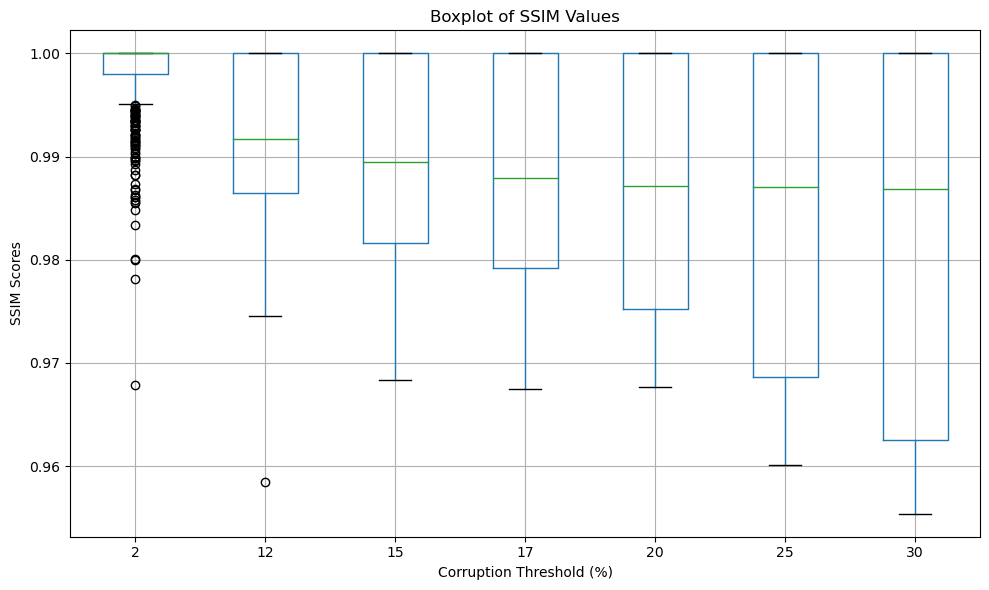

In [8]:
df = pd.read_csv("./SSIM_Analysis/Demo.csv")
print(df.columns)

# Select only the SSIM columns for the boxplot
ssim_columns = df.columns[1:]  # Exclude 'Image_Index'
ssim_data = df[ssim_columns]

# Rename columns to only show the threshold values (e.g., "2" for "SSIM_2")
ssim_data.columns = [col.split('_')[1] for col in ssim_columns]

# Create the boxplot
plt.figure(figsize=(10, 6))
ssim_data.boxplot()
plt.title("Boxplot of SSIM Values")
plt.xlabel("Corruption Threshold (%)")
plt.ylabel("SSIM Scores")

# Save and show the plot
plt.tight_layout()
plt.savefig('./Corruption_pixels_data/ssim_boxplots.png')
plt.show()